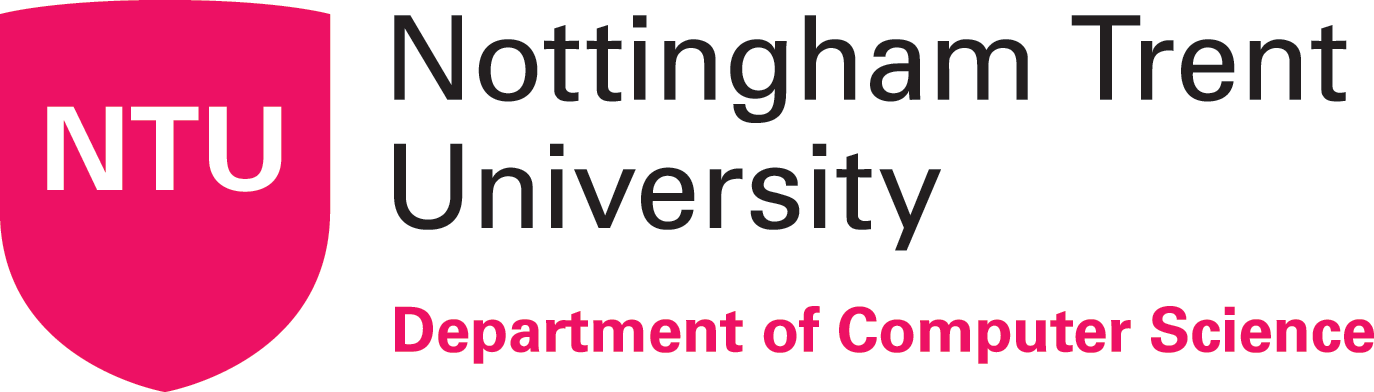

# SOFT40161 - Introduction to Computer Programming
# Submission of the Coursework

## Name:
## NTU ID:

<font  color= 'red'> **The Full description of the Coursework is here -** </font>

<a href="https://now.ntu.ac.uk/d2l/le/content/1037562/viewContent/13280440/View">SOFT40161-Coursework (Click here)</a>

# Start your answer here-

<font  color= 'green'> **GitHub Link to access your activity.** </font>

Please add your Link here: <a href="https://github.com/">https://github.com/tonimemaj/SOFT40161.git</a>

# Section 1: Control Structures (16 marks)


# Explanation and Documentation

## Dataset Overview

The dataset analyzed is named **`covid_19_clean_complete.csv`**, which was obtained from Kaggle. It contains daily updates on the following key metrics related to the COVID-19 pandemic worldwide:

| **Column**        | **Description**                                           |
|--------------------|-----------------------------------------------------------|
| **Date**          | The date of the recorded data.                            |
| **Country/Region**| The country or region where data was collected.           |
| **Confirmed**     | The cumulative number of confirmed COVID-19 cases.        |
| **Deaths**        | The cumulative number of deaths caused by COVID-19.       |
| **Recovered**     | The cumulative number of recovered cases.                 |

This dataset supports time-series analysis, allowing for the study of trends in confirmed cases, identification of anomalies, and insights into how the pandemic evolved and its severity across different regions.

---

## Real-World Problem

The COVID-19 pandemic has had a significant impact on global public health and economies. This analysis focuses on understanding key aspects of the pandemic through the dataset. One of the main objectives is to identify trends in confirmed cases over time, which can provide a clearer picture of the pandemic's progression and intensity.

Another goal is to compare countries and highlight those with the highest numbers of confirmed cases. This comparison can shed light on regional disparities and help policymakers allocate resources effectively. Additionally, the analysis aims to detect anomalies in daily growth rates. These anomalies could be due to reporting errors or unexpected outbreaks, and identifying them can help improve data accuracy and reveal critical patterns.

By addressing these objectives, the analysis contributes to a deeper understanding of the pandemic and supports efforts to mitigate its impact.


---

## Control Structures and Methods

To analyze the data effectively, the following computational methods and control structures are applied:

| **Method/Structure**  | **Purpose**                                                                 |
|------------------------|-----------------------------------------------------------------------------|
| **If Statements**      | Detect and flag anomalies in the daily growth rates of cases.               |
| **Loops**              | Iterate over country-wise data to classify risk levels and summarize trends.|
| **Data Filtering**     | Extract specific insights, such as the countries with the most cases.       |
| **Grouping**           | Aggregate data to compute daily growth rates and total metrics for regions. |

By using these techniques, we can systematically analyze the data to uncover meaningful trends and address the stated objectives.


Missing values:
 Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


C:\Users\fatjo\AppData\Local\Temp\ipykernel_24600\4202098345.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Risk Level'] = latest_data.apply(classify_risk, axis=1)


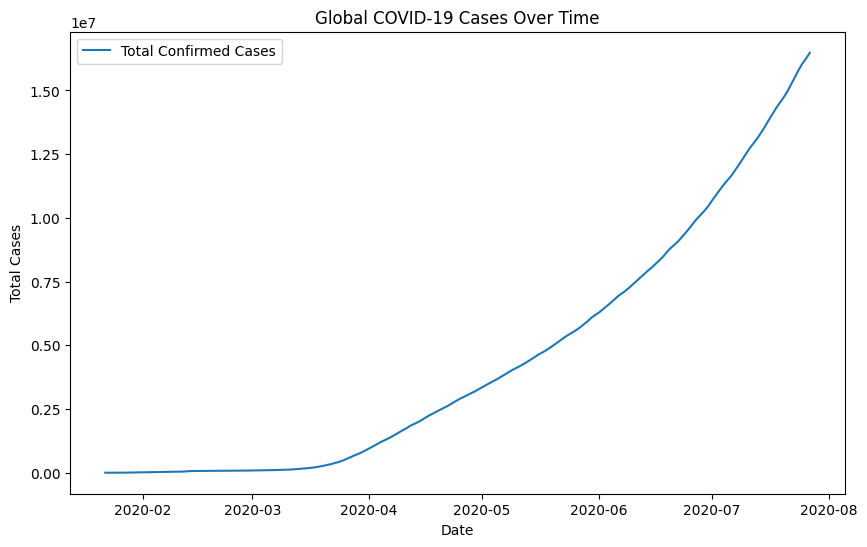

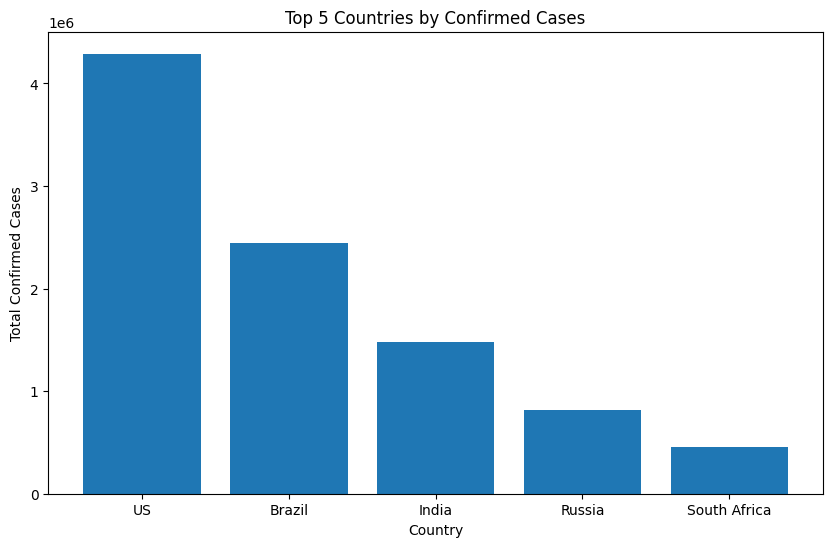

Anomalies in daily growth rates:
          Date  Confirmed  Daily Growth  Anomaly
149 2020-06-19    8647784      180806.0     True
155 2020-06-25    9586141      177887.0     True
156 2020-06-26    9777487      191346.0     True
157 2020-06-27    9955597      178110.0     True
161 2020-07-01   10667386      217689.0     True
162 2020-07-02   10875091      207705.0     True
163 2020-07-03   11078585      203494.0     True
164 2020-07-04   11272152      193567.0     True
165 2020-07-05   11454847      182695.0     True
167 2020-07-07   11833034      210844.0     True
168 2020-07-08   12044836      211802.0     True
169 2020-07-09   12273063      228227.0     True
170 2020-07-10   12505640      232577.0     True
171 2020-07-11   12721968      216328.0     True
172 2020-07-12   12914636      192668.0     True
173 2020-07-13   13107415      192779.0     True
174 2020-07-14   13328867      221452.0     True
175 2020-07-15   13559984      231117.0     True
176 2020-07-16   13812525      25254

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("../data/COVID-19 Dataset/covid_19_clean_complete.csv")

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Calculate daily global confirmed cases
daily_cases = data.groupby('Date')['Confirmed'].sum().reset_index()
daily_cases['Daily Growth'] = daily_cases['Confirmed'].diff().fillna(0)

# Spot unusual spikes in daily growth (more than 200% of the average growth)
daily_growth_mean = daily_cases['Daily Growth'].mean()
daily_cases['Anomaly'] = daily_cases['Daily Growth'] > (2 * daily_growth_mean)

# Find top 5 countries with the highest confirmed cases (latest date)
latest_date = data['Date'].max()
latest_data = data[data['Date'] == latest_date]
top_countries = latest_data.groupby('Country/Region')['Confirmed'].sum().reset_index()
top_countries = top_countries.sort_values(by='Confirmed', ascending=False).head(5)

# Group countries by risk levels using their confirmed cases
def classify_risk(row):
    if row['Confirmed'] > 1_000_000:
        return "High Risk"
    elif row['Confirmed'] > 100_000:
        return "Moderate Risk"
    else:
        return "Low Risk"

latest_data['Risk Level'] = latest_data.apply(classify_risk, axis=1)

# Visualizations
plt.figure(figsize=(10, 6))
plt.plot(daily_cases['Date'], daily_cases['Confirmed'], label='Total Confirmed Cases')
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(top_countries['Country/Region'], top_countries['Confirmed'])
plt.title("Top 5 Countries by Confirmed Cases")
plt.xlabel("Country")
plt.ylabel("Total Confirmed Cases")
plt.show()

# Print anomalies
print("Anomalies in daily growth rates:")
print(daily_cases[daily_cases['Anomaly']])

# Print top countries
print("Top 5 countries by confirmed cases:")
print(top_countries)

# Summary of country risk levels
risk_summary = latest_data.groupby('Risk Level').size()
print("\nCountry Risk Levels Summary:")
print(risk_summary)

# Reflection on Results

## Findings

### Global Trends

The analysis revealed that confirmed COVID-19 cases followed an exponential growth pattern during the initial phases of the pandemic. However, as interventions like lockdowns and vaccinations were implemented, the growth began to stabilize over time. Periodic spikes in daily case growth were observed, which were likely caused by delayed reporting or sudden outbreaks in specific regions.

### Top Countries

The five countries with the highest confirmed case counts were identified. These countries showed significant variations in their numbers, which were influenced by factors such as population size, the strength of healthcare systems, and public health policies. The differences highlight the importance of region-specific interventions and preparedness in managing the pandemic.

### Risk Levels

Countries were categorized into three risk levels: **High Risk**, **Moderate Risk**, and **Low Risk**, based on their total number of confirmed cases. Most countries were classified as "Low Risk," with only a small number falling under the "High Risk" category. This classification provided a simplified overview of how the pandemic impacted different regions.

| **Risk Level**  | **Criteria**                  | **Observations**                      |
|------------------|-------------------------------|---------------------------------------|
| High Risk        | Confirmed cases > 1,000,000  | Few countries, indicating severe impact. |
| Moderate Risk    | 100,000 < Confirmed cases ≤ 1,000,000 | A moderate number of countries.         |
| Low Risk         | Confirmed cases ≤ 100,000    | Majority of countries fell here.      |

---

## Challenges and Limitations

### Missing Data

The dataset had incomplete data points in some areas, which might have affected the accuracy and reliability of the analysis. For instance, missing records on specific dates or regions could lead to underrepresentation of cases or deaths.

### Simplistic Anomaly Detection

The method used to detect anomalies in daily case growth was based on a simple threshold (200% of average daily growth). While this approach provided some insights, more advanced techniques, such as statistical models or machine learning algorithms, could have improved accuracy in identifying irregularities.

### Generalization of Risk Levels

The risk classification relied solely on the total number of confirmed cases, without considering factors like population size, healthcare capacity, or testing rates. As a result, the classifications may not fully capture the relative severity of the pandemic's impact across regions.

---

By addressing these challenges, future analyses could provide more comprehensive and accurate insights into the progression and impact of global health crises like COVID-19.


# Section 2: Functions and Modules (16 marks)  

In [5]:
# Explanation and Documentation 

In [6]:
# Reflection on results 

# Section 3: Data Handling with Pandas (16 marks)  

In [7]:
# Explanation and Documentation 

In [8]:
# Reflection on results 

# Section 4: Data Visualization (16 marks)  

In [9]:
# Explanation and Documentation 

In [10]:
# Reflection on results 

# Section 5: GUI Development (16 marks)  

In [11]:
# Explanation and Documentation 

In [12]:
# Reflection on results 

# Section 6: Conclusion: Version Control, Critical Appraisal, Documentation (20 marks)  

In [13]:
# Explanation and Documentation 

# References:


# Appendix:

(If any)